In [1]:
xml_path = "Annotations"
image_path = "images"

# **Explorar**

In [24]:
import xml.etree.ElementTree as ET
import os

def count_objects_by_class(xml_path):
    class_counts = {}
    
    xml_files = [f for f in os.listdir(xml_path) if f.endswith('.xml')]
    
    for xml_file in xml_files:
        tree = ET.parse(os.path.join(xml_path, xml_file))
        root = tree.getroot()
        
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name == "Airplane":
                class_name = "Ambrosia" 
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    
    return class_counts


# Contar objetos por clase
object_counts = count_objects_by_class(xml_path)
print(f"Conteo de objetos por clase: {object_counts}")

# Convertir el diccionario a un DataFrame
df = pd.DataFrame(list(object_counts.items()), columns=['Class', 'Count'])

Conteo de objetos por clase: {'Ambrosia': 276, 'P.Convolvulus': 364, 'Xhantium': 282, 'Qualium_Aparine': 229, 'Heredacea': 549, 'Avena': 360, 'Aegylops': 736, 'I.Lacumosa': 981, 'Malva_Porviflora': 417}


In [26]:
df

,Class,Count
0,Ambrosia,276
1,P.Convolvulus,364
2,Xhantium,282
3,Qualium_Aparine,229
4,Heredacea,549
5,Avena,360
6,Aegylops,736
7,I.Lacumosa,981
8,Malva_Porviflora,417


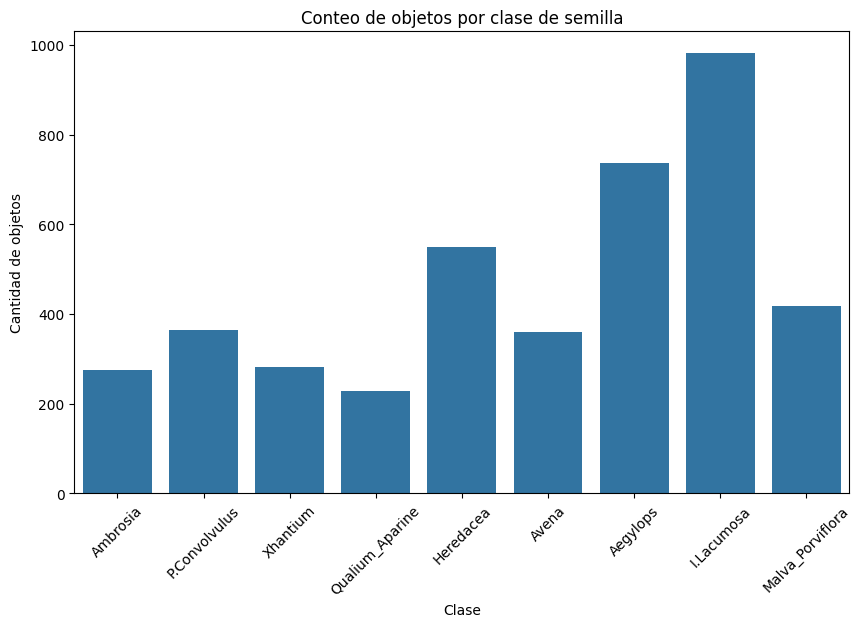

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Crear el countplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=df, order=df['Class'])
plt.xlabel('Clase')
plt.ylabel('Cantidad de objetos')
plt.title('Conteo de objetos por clase de semilla')
plt.xticks(rotation=45)
plt.show()

---

In [2]:
import xml.etree.ElementTree as ET
import os 

def extract_classes_from_xml(xml_path):
    classes = set()
    
    xml_files = [f for f in os.listdir(xml_path) if f.endswith('.xml')]
    
    for xml_file in xml_files:
        tree = ET.parse(os.path.join(xml_path, xml_file))
        root = tree.getroot()
        
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            classes.add(class_name)
    
    return list(classes)

# Extraer clases únicas
unique_classes = extract_classes_from_xml(xml_path)
print(f"Clases únicas encontradas: {unique_classes}")

Clases únicas encontradas: ['Qualium_Aparine', 'Aegylops', 'I.Lacumosa', 'Heredacea', 'Avena', 'Malva_Porviflora', 'Xhantium', 'Airplane', 'P.Convolvulus']


In [3]:
unique_classes.pop(6)
unique_classes, len(unique_classes)

(['Qualium_Aparine',
  'Aegylops',
  'I.Lacumosa',
  'Heredacea',
  'Avena',
  'Malva_Porviflora',
  'Airplane',
  'P.Convolvulus'],
 8)

In [18]:
import xml.etree.ElementTree as ET

# Diccionario de clases
class_map = {
  'Avena': 0,
  'I.Lacumosa': 1,
  'Malva_Porviflora': 2,
  'Xhantium': 3,
  'Aegylops': 4,
  'P.Convolvulus': 5,
  'Heredacea': 6,
  'Qualium_Aparine': 7,
  'Ambrosia': 8,
  'Otra': 9 
}

def convert_xml_to_txt(xml_file, txt_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    with open(txt_file, 'w') as file:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            class_id = class_map.get(class_name, 9)  # 8 como valor predeterminado si no se encuentra la clase
            if class_name not in list(class_map.keys()):
              class_name = 'Ambrosia'
              class_id = 8
              print(class_name)
              print(class_id)
              print(txt_file)
              
            bndbox = obj.find('bndbox')
            xmin = float(bndbox.find('xmin').text)
            xmax = float(bndbox.find('xmax').text)
            ymin = float(bndbox.find('ymin').text)
            ymax = float(bndbox.find('ymax').text)
            
            # Calcular el formato YOLO
            x_center = (xmin + xmax) / 2.0 / float(root.find('size').find('width').text)
            y_center = (ymin + ymax) / 2.0 / float(root.find('size').find('height').text)
            width = (xmax - xmin) / float(root.find('size').find('width').text)
            height = (ymax - ymin) / float(root.find('size').find('height').text)
            
            file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

In [19]:
list(class_map.keys())

['Avena',
 'I.Lacumosa',
 'Malva_Porviflora',
 'Xhantium',
 'Aegylops',
 'P.Convolvulus',
 'Heredacea',
 'Qualium_Aparine',
 'Ambrosia',
 'Otra']

In [24]:
# Rutas a las carpetas
txt_path = 'txt_files'
train_images_path = 'dataset/train/images'
train_labels_path = 'dataset/train/labels'
val_images_path = 'dataset/valid/images'
val_labels_path = 'dataset/valid/labels'

# Crear carpetas si no existen
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

In [21]:
#EJEMPLO
xml_list = os.listdir(xml_path)
example = os.path.join(xml_path, xml_list[0])

txt_file = 'example.txt'
convert_xml_to_txt(example, txt_file)

Ambrosia
8
example.txt
Ambrosia
8
example.txt
Ambrosia
8
example.txt
Ambrosia
8
example.txt


In [22]:
# Convertir archivos XML a TXT
xml_files = [f for f in os.listdir(xml_path) if f.endswith('.xml')]
for xml in xml_files:
    base_name = xml.split('.')[0]
    xml_file = os.path.join(xml_path, xml)
    txt_file = os.path.join(txt_path, base_name + '.txt')
    convert_xml_to_txt(xml_file, txt_file)
print("Conversión completada!")

Ambrosia
8
txt_files\01075071-Ambrosia_Trifida42.txt
Ambrosia
8
txt_files\01075071-Ambrosia_Trifida42.txt
Ambrosia
8
txt_files\01075071-Ambrosia_Trifida42.txt
Ambrosia
8
txt_files\01075071-Ambrosia_Trifida42.txt
Ambrosia
8
txt_files\03459d3c-Ambrosia_Trifida1.txt
Ambrosia
8
txt_files\03459d3c-Ambrosia_Trifida1.txt
Ambrosia
8
txt_files\03459d3c-Ambrosia_Trifida1.txt
Ambrosia
8
txt_files\03459d3c-Ambrosia_Trifida1.txt
Ambrosia
8
txt_files\0662b468-Ambrosia_Trifida9.txt
Ambrosia
8
txt_files\0662b468-Ambrosia_Trifida9.txt
Ambrosia
8
txt_files\0662b468-Ambrosia_Trifida9.txt
Ambrosia
8
txt_files\0662b468-Ambrosia_Trifida9.txt
Ambrosia
8
txt_files\0662b468-Ambrosia_Trifida9.txt
Ambrosia
8
txt_files\08059e24-Ambrosia_Trifida37.txt
Ambrosia
8
txt_files\08059e24-Ambrosia_Trifida37.txt
Ambrosia
8
txt_files\08059e24-Ambrosia_Trifida37.txt
Ambrosia
8
txt_files\08059e24-Ambrosia_Trifida37.txt
Ambrosia
8
txt_files\08059e24-Ambrosia_Trifida37.txt
Ambrosia
8
txt_files\08059e24-Ambrosia_Trifida37.txt
Am

In [25]:
import random 
import shutil

# Obtener lista de archivos TXT
txt_files = [f for f in os.listdir(txt_path) if f.endswith('.txt')]

# Dividir en entrenamiento (80%) y prueba (20%)
random.shuffle(txt_files)
train_files = txt_files[:int(0.8 * len(txt_files))]
val_files = txt_files[int(0.8 * len(txt_files)):]

# Mover archivos a las carpetas correspondientes
for file in train_files:
    base_name = file.split('.')[0]
    shutil.move(os.path.join(txt_path, file), os.path.join(train_labels_path, file))
    shutil.move(os.path.join(image_path, base_name + '.jpg'), os.path.join(train_images_path, base_name + '.jpg'))

for file in val_files:
    base_name = file.split('.')[0]
    shutil.move(os.path.join(txt_path, file), os.path.join(val_labels_path, file))
    shutil.move(os.path.join(image_path, base_name + '.jpg'), os.path.join(val_images_path, base_name + '.jpg'))

print("División completada!")

División completada!


In [26]:
unique_classes.append('Otra')

In [27]:
unique_classes

['Qualium_Aparine',
 'Aegylops',
 'I.Lacumosa',
 'Heredacea',
 'Avena',
 'Malva_Porviflora',
 'Airplane',
 'P.Convolvulus',
 'Otra']

In [28]:
unique_classes = ['Avena', 'I.Lacumosa','Malva_Porviflora','Xhantium','Aegylops','P.Convolvulus','Heredacea','Qualium_Aparine','Ambrosia','Otra']

In [29]:
import yaml

# Crear el archivo data.yaml
data_yaml_content = {
    'train': 'train',
    'val': 'valid',
    'nc': len(unique_classes),  # número de clases
    'names': unique_classes  # nombres de las clases
}

with open('data.yaml', 'w') as file:
    yaml.dump(data_yaml_content, file, default_flow_style=False)

print("Archivo data.yaml creado!")

Archivo data.yaml creado!


---